# IMDB Dataset

In [1]:
import pandas as pd
import numpy as np
import random as rnd

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv('movie_metadata.csv')
data['profit'] = data['gross'] - data['budget']
data['ROI'] = (data['profit']/data['budget'])*100
data1 = data.sort(['profit'], ascending=False)
data2 = data.sort(['ROI'], ascending=False)
#print(data.head()


/home/beautifulsoup4/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/beautifulsoup4/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [3]:
top_15_profit = data1.head(15)
top_15_ROI = data2.head(15)
#print(data2['movie_title'].head())
t1_imp = top_15_profit[['movie_title','gross','budget','profit']]
t2_imp = top_15_ROI[['movie_title','gross','budget','profit']]
t1 = t1_imp.values
t2 = t2_imp.values

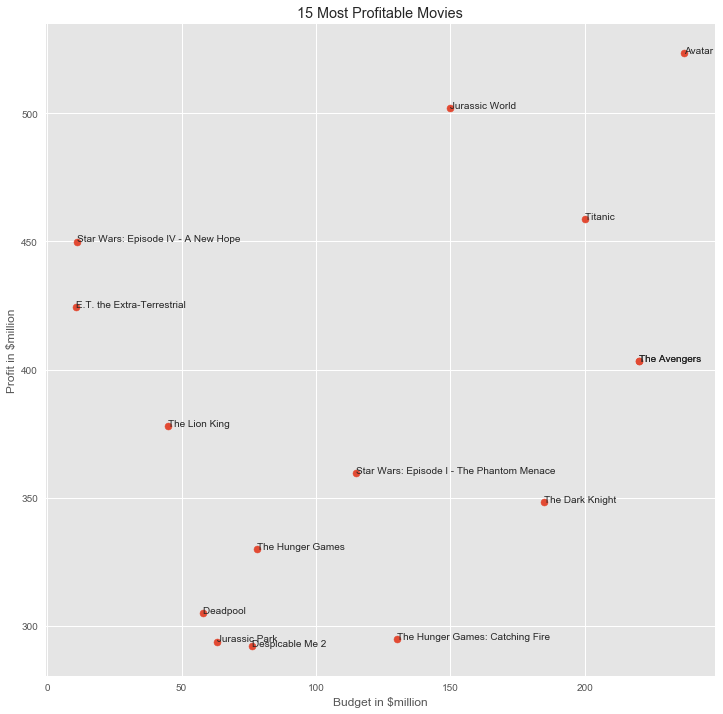

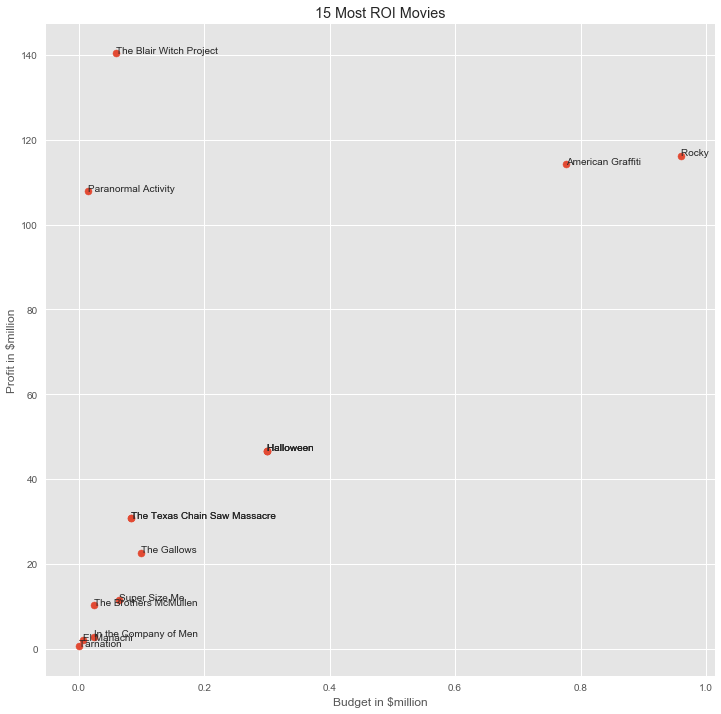

In [6]:
fig1,ax1 = plt.subplots(figsize = (12,12))
fig2,ax2 = plt.subplots(figsize = (12,12))
ax1.scatter(t1[:,2]/1000000,t1[:,3]/1000000, marker='o',)
ax2.scatter(t2[:,2]/1000000,t2[:,3]/1000000, marker='o',)
for i,txt in enumerate(t1[:,0]):
    ax1.annotate(txt,(t1[i,2]/1000000,t1[i,3]/1000000))

for i, txt in enumerate(t2[:,0]):
    ax2.annotate(txt, (t2[i, 2] / 1000000, t2[i, 3]/1000000))
ax1.set_xlabel('Budget in $million')
ax1.set_ylabel('Profit in $million')
ax1.set_title('15 Most Profitable Movies')

ax2.set_xlabel('Budget in $million')
ax2.set_ylabel('Profit in $million')
ax2.set_title('15 Most ROI Movies')

In [7]:
data_dir = data.sort_values(['director_name'],na_position='last')
dir = data_dir[['director_name', 'budget', 'profit', 'ROI']]

counts= dir.groupby(['director_name']).count()
#dir_name = dir.drop_duplicates(['director_name'])

dir2 = dir
dir = dir.groupby(['director_name'], as_index= False).mean()
dir2 = dir2.groupby(['director_name'], as_index= False).sum()
dir['count'] = dir2['budget']/dir['budget']

dir1 = dir.sort(['profit'], ascending=False)
print(dir1[dir1['director_name'] == 'Steven Spielberg'])
top15_dir = dir1.head(20)
#print(top15_dir.head())
#top15_dir.drop(['index'], axis = 1, inplace = True)

ddir = top15_dir.values

         director_name        budget       profit         ROI  count
2157  Steven Spielberg  6.395773e+07  99453289.24  489.874132   26.0


/home/beautifulsoup4/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


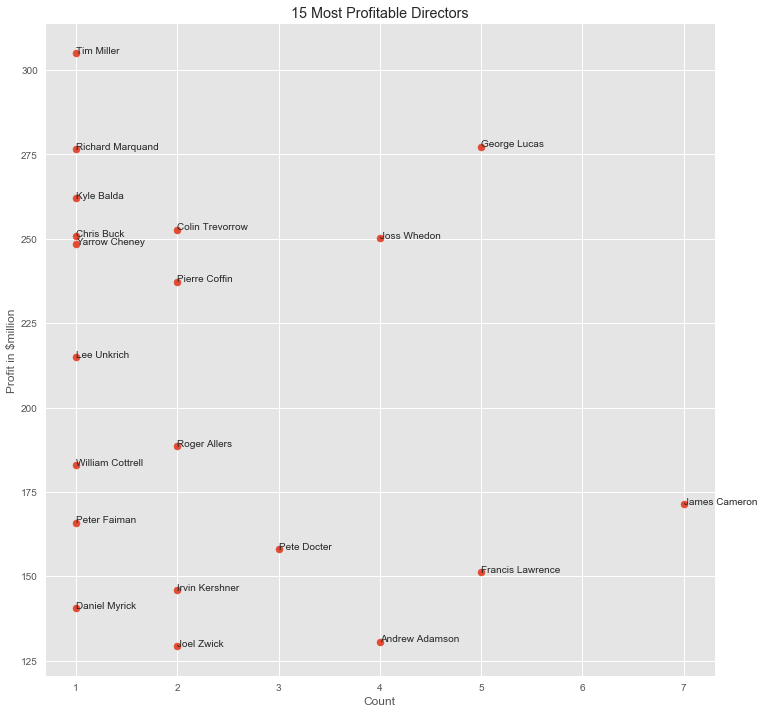

In [9]:
fig3, ax3 = plt.subplots(figsize = (12,12))
ax3.scatter(ddir[:,4], ddir[:,2]/1000000, marker = 'o')
#dir['avg_profit'] = dir['profit']/counts['profit'] if (counts['director_name'] == dir['director_name'])
for i, txt in enumerate(ddir[:,0]):
    ax3.annotate(txt, (ddir[i, 4], ddir[i, 2]/1000000))
ax3.set_xlabel('Count')
ax3.set_ylabel('Profit in $million')
ax3.set_title('15 Most Profitable Directors')